In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
# Initialize a local Spark session
spark = SparkSession.builder \
    .appName("Dibimbing") \
    .master("local[*]") \
    .getOrCreate()

print("Local Spark session initiated successfully.")


24/10/24 13:11:58 WARN Utils: Your hostname, Rians-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.68.114 instead (on interface en0)
24/10/24 13:11:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/24 13:11:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Local Spark session initiated successfully.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
calendar_df = spark.read.csv("data/calendar.csv", header=True, inferSchema=True)
customer_flight_df = spark.read.csv("data/customer_flight_activity.csv", header=True, inferSchema=True)
customer_loyalty_df = spark.read.csv("data/customer_loyalty_history.csv", header=True, inferSchema=True)

In [4]:
calendar_df.show(5)

+---+----------+-----------------+--------------------+------------------+
|_c0|      date|start_of_the_year|start_of_the_quarter|start_of_the_month|
+---+----------+-----------------+--------------------+------------------+
|  0|2012-01-01|       2012-01-01|          2012-01-01|        2012-01-01|
|  1|2012-01-02|       2012-01-01|          2012-01-01|        2012-01-01|
|  2|2012-01-03|       2012-01-01|          2012-01-01|        2012-01-01|
|  3|2012-01-04|       2012-01-01|          2012-01-01|        2012-01-01|
|  4|2012-01-05|       2012-01-01|          2012-01-01|        2012-01-01|
+---+----------+-----------------+--------------------+------------------+
only showing top 5 rows



24/10/24 13:12:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , date, start_of_the_year, start_of_the_quarter, start_of_the_month
 Schema: _c0, date, start_of_the_year, start_of_the_quarter, start_of_the_month
Expected: _c0 but found: 
CSV file: file:///Users/rian/Github/dibimbing-github/calendar.csv


In [5]:
customer_flight_df.show(5)

+---+--------------+----+-----+-------------+--------+------------------+---------------+---------------------------+
|_c0|loyalty_number|year|month|total_flights|distance|points_accumulated|points_redeemed|dollar_cost_points_redeemed|
+---+--------------+----+-----+-------------+--------+------------------+---------------+---------------------------+
|  0|        100590|2018|    6|           12|   15276|           22914.0|              0|                          0|
|  1|        100590|2018|    7|           12|    9168|           13752.0|              0|                          0|
|  2|        100590|2018|    5|            4|    6504|            9756.0|              0|                          0|
|  3|        100590|2018|   10|            0|       0|               0.0|            512|                         92|
|  4|        100590|2018|    2|            0|       0|               0.0|              0|                          0|
+---+--------------+----+-----+-------------+--------+--

24/10/24 13:12:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , loyalty_number, year, month, total_flights, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed
 Schema: _c0, loyalty_number, year, month, total_flights, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed
Expected: _c0 but found: 
CSV file: file:///Users/rian/Github/dibimbing-github/customer_flight_activity.csv


24/10/24 13:12:12 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [6]:
customer_loyalty_df.show(5)

+---+--------------+-------+----------------+---------+-----------+------+---------+--------+--------------+------------+-----------------------+---------------+---------------+----------------+-----------------+------------------+
|_c0|loyalty_number|country|        province|     city|postal_code|gender|education|  salary|marital_status|loyalty_card|customer_lifetime_value|enrollment_type|enrollment_year|enrollment_month|cancellation_year|cancellation_month|
+---+--------------+-------+----------------+---------+-----------+------+---------+--------+--------------+------------+-----------------------+---------------+---------------+----------------+-----------------+------------------+
|  0|        480934| Canada|         Ontario|  Toronto|    M2Z 4K1|Female| Bachelor| 83236.0|       Married|        Star|                   NULL|       Standard|           NULL|            NULL|             NULL|              NULL|
|  1|        549612| Canada|         Alberta| Edmonton|    T3G 6Y6|  Mal

24/10/24 13:12:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , loyalty_number, country, province, city, postal_code, gender, education, salary, marital_status, loyalty_card, customer_lifetime_value, enrollment_type, enrollment_year, enrollment_month, cancellation_year, cancellation_month
 Schema: _c0, loyalty_number, country, province, city, postal_code, gender, education, salary, marital_status, loyalty_card, customer_lifetime_value, enrollment_type, enrollment_year, enrollment_month, cancellation_year, cancellation_month
Expected: _c0 but found: 
CSV file: file:///Users/rian/Github/dibimbing-github/customer_loyalty_history.csv


In [7]:
calendar_pd = calendar_df.toPandas()
customer_flight_pd = customer_flight_df.toPandas()
customer_loyalty_pd = customer_loyalty_df.toPandas()


24/10/24 13:12:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , date, start_of_the_year, start_of_the_quarter, start_of_the_month
 Schema: _c0, date, start_of_the_year, start_of_the_quarter, start_of_the_month
Expected: _c0 but found: 
CSV file: file:///Users/rian/Github/dibimbing-github/calendar.csv
24/10/24 13:12:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , loyalty_number, year, month, total_flights, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed
 Schema: _c0, loyalty_number, year, month, total_flights, distance, points_accumulated, points_redeemed, dollar_cost_points_redeemed
Expected: _c0 but found: 
CSV file: file:///Users/rian/Github/dibimbing-github/customer_flight_activity.csv
24/10/24 13:12:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , loyalty_number, country, province, city, postal_code, gender, education, salary, marital_status, loyalty_card, custom

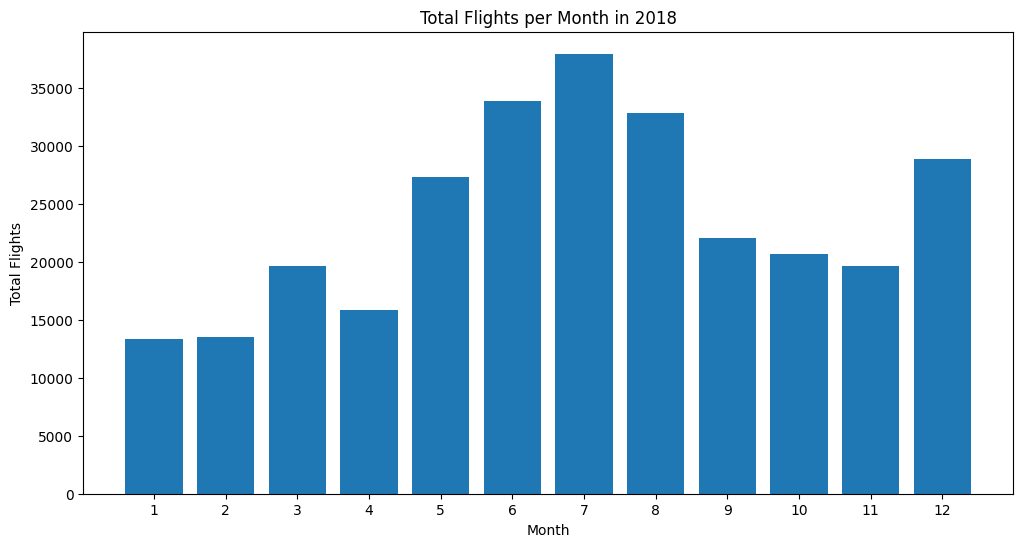

In [8]:
# 1. Total Flights per Month (2018)
monthly_flights = customer_flight_pd[customer_flight_pd['year'] == 2018].groupby('month')['total_flights'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(monthly_flights['month'], monthly_flights['total_flights'])
plt.title('Total Flights per Month in 2018')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.xticks(range(1, 13))
plt.show()


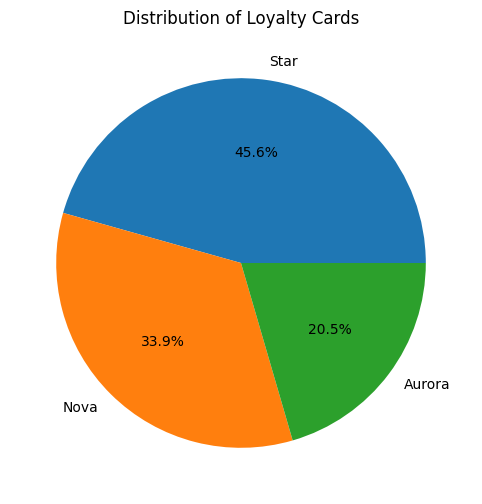

In [9]:
# 2. Distribution of Loyalty Cards
loyalty_card_distribution = customer_loyalty_pd['loyalty_card'].value_counts()
plt.figure(figsize=(10, 6))
loyalty_card_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Loyalty Cards')
plt.ylabel('')
plt.show()

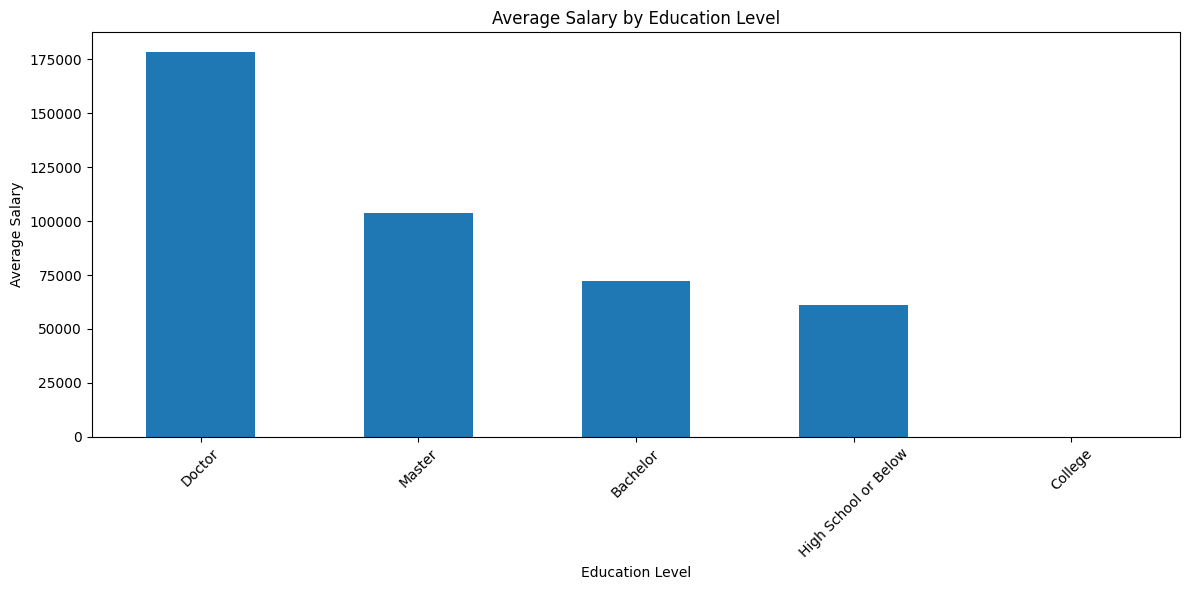

In [10]:
# 3. Average Salary by Education Level
avg_salary_by_education = customer_loyalty_pd.groupby('education')['salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_salary_by_education.plot(kind='bar')
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

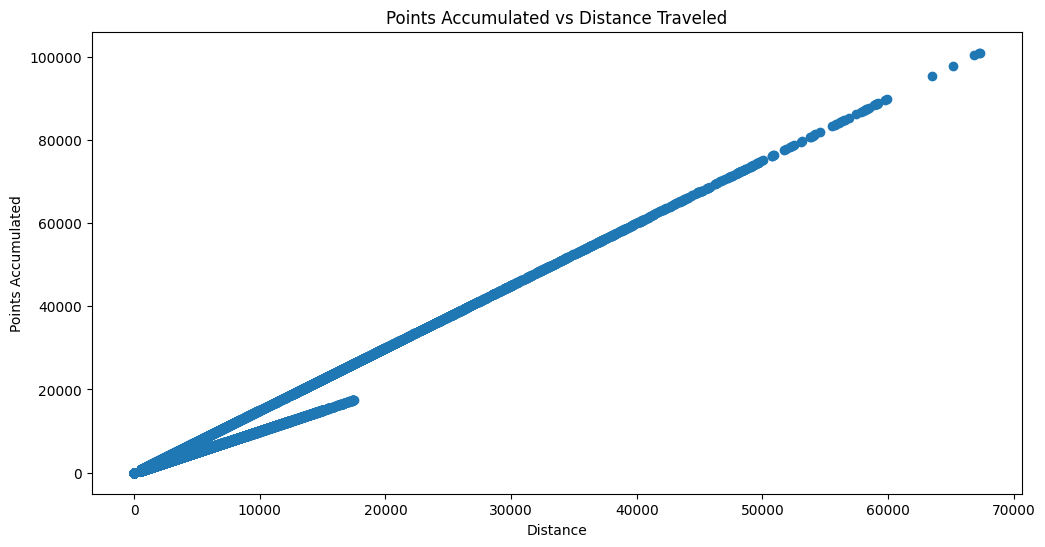

In [11]:
# 4. Points Accumulated vs Distance Traveled
plt.figure(figsize=(12, 6))
plt.scatter(customer_flight_pd['distance'], customer_flight_pd['points_accumulated'])
plt.title('Points Accumulated vs Distance Traveled')
plt.xlabel('Distance')
plt.ylabel('Points Accumulated')
plt.show()